## Lec 1. Intro

- DNN101 (Deep Neural Network)
- Artificial Intelligence `人工智能`
    - 专家系统
    - Machine Learning `机器学习` (scikit-learning)
        - 线性回归, 逻辑回归
        - 朴素贝叶斯
        - 决策树
        - 集成模型: 随机森林, XGBoosting, LightGBM, .......
        - 多层感知机 MLP (神经网络)
            - Deep Learning `深度学习`
---
- 机器学习模型分类
    - 有监督学习
        - Regression 回归模型
        - Classification 分类模型
        - Generative 生成式模型
    - 无监督学习
        - Clustering 聚类模型
        - Reinforcement Learning 强化学习
- 常见算法领域
    - Computer Vision 计算机视觉
    - Nature Language Processing 自然语言处理
    - Recommendation System 推荐系统
    - Reinforcement Learning 强化学习
    - .......
- 深度学习常用框架
    - tensorflow
    - **pytorch**
    - mxnet
    - paddle
---
### 1.1 课程计划
- Linear Neural Network
- CNN
- (Diffusion)
- RNN
- Transformer

### 1.2 Linear Regression 线性回归 & Linear Neural Network 线性神经网络

`f(x) = x*weight + bias`

In [8]:
import torch
import numpy as np

In [57]:
def linear_regression(x: float) -> float:
    """ 线性回归函数 """
    weight = 5
    bias = 2
    return x * weight + bias

In [58]:
linear_regression(3)

17

In [5]:
[1, 2, 3]  # 列表
np.array([1, 2, 3])  # 向量
torch.tensor([1, 2, 3])  # 张量

tensor([1, 2, 3])

In [29]:
torch.matmul(torch.rand(2, 3), torch.rand(3, 5))

tensor([[0.3195, 0.4655, 0.4962, 0.3247, 0.3099],
        [0.6993, 0.7386, 1.1853, 0.5273, 0.8210]])

In [30]:
torch.rand(2, 3) @ torch.rand(3, 5) 

tensor([[1.0202, 1.0986, 0.7459, 0.5469, 0.7036],
        [1.6224, 1.1954, 0.9998, 0.9455, 1.0561]])

In [35]:
x = torch.rand(2, 3)
x

tensor([[0.1589, 0.9310, 0.1029],
        [0.6460, 0.7887, 0.4697]])

In [36]:
torch.nn.Parameter(x)

Parameter containing:
tensor([[0.1589, 0.9310, 0.1029],
        [0.6460, 0.7887, 0.4697]], requires_grad=True)

In [59]:
def linear_neural_network(x: torch.tensor) -> torch.tensor:
    """ 线性神经网络运算函数 """
    weight = torch.nn.Parameter(torch.rand(3, 5))
    bias = torch.nn.Parameter(torch.rand(5))
    return x @ weight + bias

In [56]:
linear_regression(torch.rand(2, 3))

tensor([[1.9303, 1.5927, 0.9763, 1.0773, 0.9797],
        [1.9847, 1.5480, 1.0307, 0.8322, 1.1257]], grad_fn=<AddBackward0>)

In [48]:
class Linear(torch.nn.Module):
    """ 线性神经网络 """
    def __init__(self, in_features, out_features):
        super().__init__()
        self.weight = torch.nn.Parameter(torch.rand(in_features, out_features))
        self.bias = torch.nn.Parameter(torch.rand(out_features))
        
    def forward(self, x):
        return x @ self.weight + self.bias

In [49]:
x = torch.rand(3, 3)

In [52]:
model = Linear(3, 5)
output = model(x)
output

tensor([[1.0307, 1.5766, 0.7109, 0.7663, 1.9070],
        [0.4469, 1.0405, 0.4955, 0.5855, 0.9781],
        [0.7757, 1.4251, 0.9131, 0.8317, 1.3327]], grad_fn=<AddBackward0>)

In [61]:
model.weight, model.bias

(Parameter containing:
 tensor([[0.5728, 0.5618, 0.3912, 0.2811, 0.8062],
         [0.5341, 0.5218, 0.1300, 0.0771, 0.8981],
         [0.2475, 0.5313, 0.7222, 0.2411, 0.0604]], requires_grad=True),
 Parameter containing:
 tensor([0.0061, 0.4697, 0.0437, 0.4031, 0.4242], requires_grad=True))

### 1.3 逻辑回归模型

In [63]:
import torch.nn.functional as F

class LogisticRegression(torch.nn.Module):
    """ 逻辑回归模型 """
    def __init__(self):
        super().__init__()
        self.fc = torch.nn.Linear(1, 1)
        
    def forward(self, x):
        """ 前向传播 """
        return F.sigmoid(self.fc(x))

In [65]:
# 生成数据集 dataset
x = torch.Tensor([[1.0], [2.0], [3.0]])
y = torch.Tensor([[0], [0], [1]])

In [81]:
model = LogisticRegression()
loss_func = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

In [82]:
total_loss = []
for i in range(5000):
    # forward
    y_hat = model(x)
    loss = loss_func(y_hat, y)
    
    # backward
    optimizer.zero_grad()
    loss.backward()
    
    # update
    optimizer.step()
    total_loss.append(loss.item())

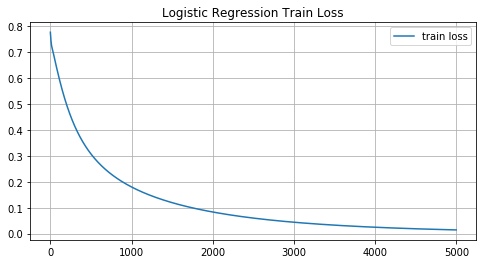

In [83]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(total_loss, label="train loss")
plt.title("Logistic Regression Train Loss")
plt.legend()
plt.grid()
plt.show()

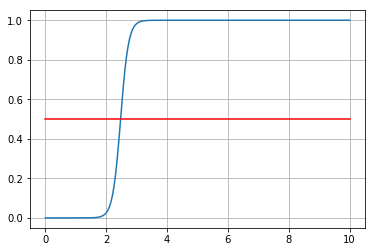

In [91]:
x_t = torch.Tensor(np.linspace(0, 10, 200)).view(200, 1)
y_hat = model(x_t)

plt.plot(x_t.data.numpy(), y_hat.data.numpy())
plt.plot([0, 10], [0.5, 0.5], c='r')
plt.grid()